# ONLINE SHOPPERS INTENTION

### Predicting conversion of revenue based on customer’s activity

## DATA SOURCE

O conjunto de dados é obtido a partir do Google Analytics, que recolhe informações sobre o desempenho dos sítios Web e também sobre todas as actividades realizadas no sítio Web pelos clientes. O conjunto de dados tem 12330 sessões únicas durante um período de 12 meses, que podem ser utilizadas para prever o comportamento dos clientes no sítio Web. A variável-alvo é desequilibrada, sendo a proporção da classe maioritária (Verdadeiro) de 84,5% e a de Falso de 15,5%. O conjunto de dados tem parâmetros do Google Analytics que podem ser utilizados para prever as receitas geradas pelos clientes.

### DATA DESCRIPTION
### CONTINUOS FEATURES


Administrative	     -Integer	- Número de páginas diferentes visitadas relacionadas com as questões administrativas do sítio Web                    

Informational	     -Integer	- Número de páginas diferentes visitadas relacionadas com as informações do sítio Web e outros conteúdos úteis do sítio Web        

ProductRelated	    - Integer	-Number of different pages visited related to different 
                                products of the website.	                                        

BounceRate         	- Float	 -   Percentage of users who left the website from the landing page	     

ExitRate	        - Float	  -  Percentage of users who left from the page the visit	             

Page Values	        - Float	   - Page Value is the average value for a page that a user 
                                visited before making a transaction.	                             

SpecialDay	        - Float	    
                               
                               0 – day of the session is not within 10 days of a special day.
                               Between 0.1 and 0.5 – day of the session is between 10 days and 5 days away from a special day.
                               Between 0.6 and 0.9 – day of the session is between 4 days and 1 day away from a special day.
                               1 – day of the session is a special day.	

The features Bounce Rates, Exit Rates and Page Values are terms of Google analytics that are used to determine the performance of a website. The bounce rate is used to show the percentage of single page sessions out of all the sessions. The exit rate shows us the percentage of people who left from a page. Page value gives us the average value of the transaction to all the pages visited which is equally distributed to all pages.

### CATEGORICAL FEATURES


Administrative_Duration	   -Integer	    
                                        
    Time spent on Administrative pages in seconds
                                        0 – No time was spent on the page                                 
                                        1 - Less time of under 233 was spent on the page
                                        2 – More time of  over 233 was spent on the page	

Informational_duration	   Integer	    

    Time spent on Informational pages in seconds                       
                                          0 – No time was spent on the page
                                          1- More time was spent on the page	

ProductRelated_Duration    Integer	    

    Time spent on pages related to products in seconds                 
                                          0 – No time was spent on the page
                                          1 - Less time of under 3384 was spent on the page
                                          2 – More time of  over 3384 was spent on the page	

Browse                    -  Integer    	-ID of bowsers from which the session took place	                   

Region	                   - Integer	 -   ID of Regions from which the session took place	

Traffic Type	            -Integer	-    ID of different types of sources from which the users landed on the website	

User Type	                -String	   - Whether the user is a returning user or a new user or of any other type	

Revenue	                   - Boolean	-    Whether the user contributed to the revenue by purchasing or not	

Weekend	                  -  Boolean  -	Whether the session was on a weekend or not	

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
# dataframe display settings
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# filtering warnings
import warnings
warnings.filterwarnings('ignore')

In [77]:
df=pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv")
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [79]:
# Limpeza de dados e análise exploratória
# Verificar dados em falta
print(data.isnull().sum())

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64


In [3]:
df.dropna(inplace=True)

In [4]:
df_new=df.copy(deep=True)

In [5]:
#administration duration
q1=df['Administrative_Duration'].quantile(0.25)
q3=df['Administrative_Duration'].quantile(0.75)
iqr=q3-q1
u_l1=q3+1.5*iqr

In [6]:
df_new['Administrative_Duration']=df_new['Administrative_Duration'].map(lambda x:0 if x==0 else (1 if x>0 and x<u_l1 else 2))
df_new['Administrative_Duration'].value_counts()

Administrative_Duration
0    5903
1    5255
2    1172
Name: count, dtype: int64

In [7]:
df_new['Informational_Duration']=df_new['Informational_Duration'].map(lambda x:0 if x==0 else 1)
df_new['Informational_Duration'].value_counts()

Informational_Duration
0    9925
1    2405
Name: count, dtype: int64

In [8]:
#ProductRelated_Duration
q1=df['ProductRelated_Duration'].quantile(0.25)
q3=df['ProductRelated_Duration'].quantile(0.75)
iqr=q3-q1
u_l1=q3+1.5*iqr

In [9]:
df_new['ProductRelated_Duration']=df_new['ProductRelated_Duration'].map(lambda x:0 if x==0 else (1 if x>0 and x<u_l1 else 2))
df_new['ProductRelated_Duration'].value_counts()

ProductRelated_Duration
1    10614
2      961
0      755
Name: count, dtype: int64

In [80]:
df_new.shape

(12330, 18)

In [11]:
df_new['Revenue'].value_counts()

Revenue
False    10422
True      1908
Name: count, dtype: int64

# Administrative_Duration

In [12]:
ct=pd.crosstab(df_new['Administrative_Duration'],df_new['Revenue'],values=df_new['BounceRates'],aggfunc='mean')
ct

Revenue,False,True
Administrative_Duration,,
0,0.042000,0.006461
1,0.007570,0.004538
2,0.008237,0.004715


<Axes: xlabel='Administrative_Duration'>

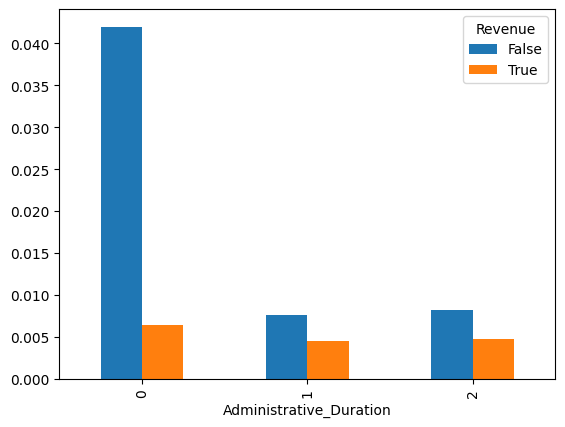

In [13]:
ct.plot.bar()

we can see avg.bounce rate when revenue true is very less then when it is false

even avg.bounce rate is decreasing as time spent increases.

In [14]:
ct=pd.crosstab(df_new['Administrative_Duration'],df_new['Revenue'],values=df_new['ExitRates'],aggfunc='mean')
ct

Revenue,False,True
Administrative_Duration,,
0,0.069683,0.022366
1,0.024111,0.018791
2,0.022361,0.017063


<Axes: xlabel='Administrative_Duration'>

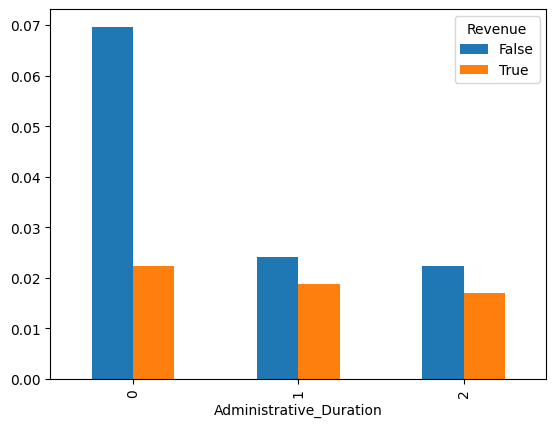

In [15]:
ct.plot.bar()

we can see avg.Exit rate when revenue true is very less then when it is false

even avg.Exit rate is decreasing as time spent increases.

In [16]:
ct=pd.crosstab(df_new['Administrative_Duration'],df_new['Revenue'],values=df_new['PageValues'],aggfunc='mean')
ct

Revenue,False,True
Administrative_Duration,,
0,0.390354,33.069752
1,3.272944,26.559909
2,5.449240,18.894392


<Axes: xlabel='Administrative_Duration'>

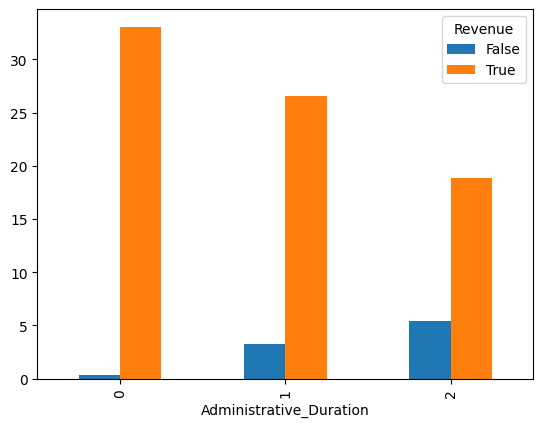

In [17]:
ct.plot.bar()

we can see pagevalue is high at duration 0 it is because of other pages

# Informational_Duration

In [18]:
ct=pd.crosstab(df_new['Informational_Duration'],df_new['Revenue'],values=df_new['BounceRates'],aggfunc='mean')
ct

Revenue,False,True
Informational_Duration,,
0,0.028935,0.005082
1,0.008443,0.005200


<Axes: xlabel='Informational_Duration'>

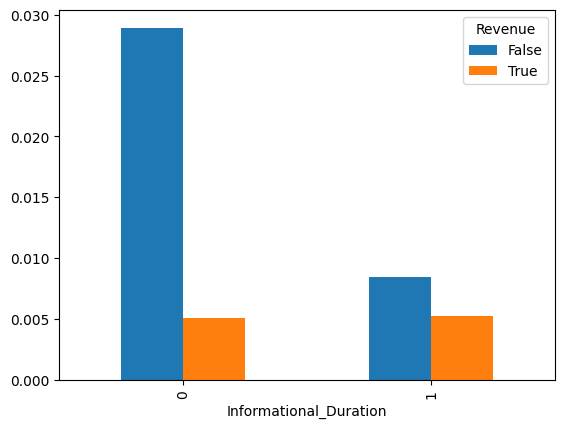

In [19]:
ct.plot.bar()

avg.bounce rate when revenue is true is very less than when revenue is true

In [20]:
ct=pd.crosstab(df_new['Informational_Duration'],df_new['Revenue'],values=df_new['ExitRates'],aggfunc='mean')
ct

Revenue,False,True
Informational_Duration,,
0,0.052381,0.020146
1,0.024047,0.018151


<Axes: xlabel='Informational_Duration'>

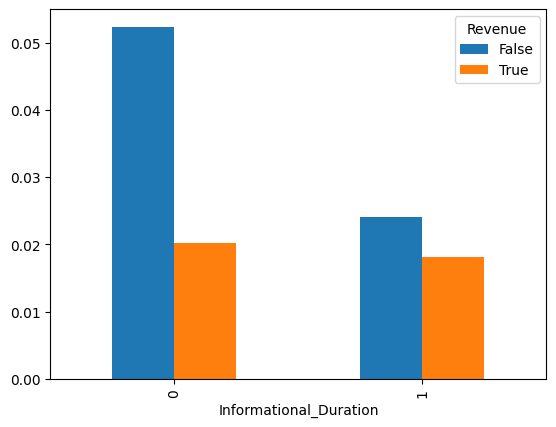

In [21]:
ct.plot.bar()

avg.exit rate when revenue is true is very less than when revenue is true

even avg.Exit rate is decreasing as time spent increases.

In [22]:
ct=pd.crosstab(df_new['Informational_Duration'],df_new['Revenue'],values=df_new['PageValues'],aggfunc='mean')
ct

Revenue,False,True
Informational_Duration,,
0,1.437477,30.10571
1,4.487730,20.51103


<Axes: xlabel='Informational_Duration'>

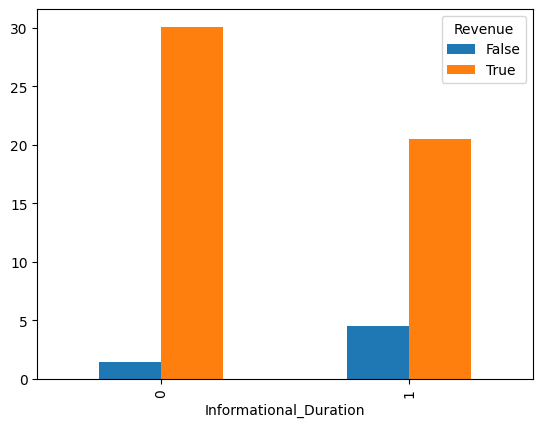

In [23]:
ct.plot.bar()

we can see high pagevalue for duration 0 it is because of other pages when this is 0

# ProductRelated_Duration

In [24]:
ct=pd.crosstab(df_new['ProductRelated_Duration'],df_new['Revenue'],values=df_new['BounceRates'],aggfunc='mean')

<Axes: xlabel='ProductRelated_Duration'>

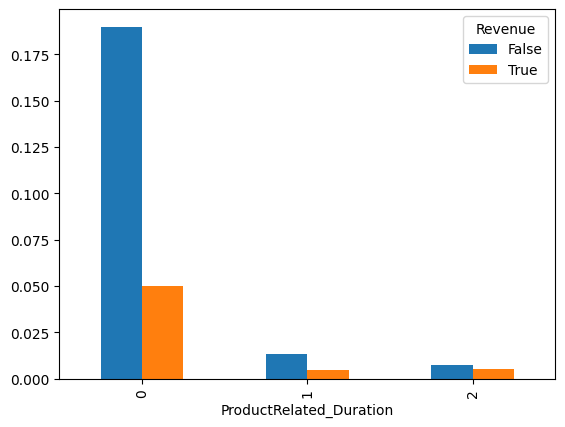

In [25]:
ct.plot.bar()

we can see avg.bounce rate when revenue true is very less then when it is false

even avg.bounce rate is decreasing as time spent increases.

In [26]:
ct=pd.crosstab(df_new['ProductRelated_Duration'],df_new['Revenue'],values=df_new['ExitRates'],aggfunc='mean')

<Axes: xlabel='ProductRelated_Duration'>

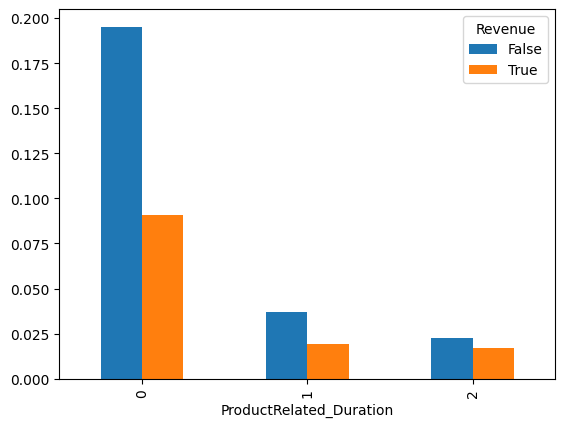

In [27]:
ct.plot.bar()

we can see avg.exit rate when revenue true is very less then when it is false

even avg.exit rate is decreasing as time spent increases.

In [28]:
ct=pd.crosstab(df_new['ProductRelated_Duration'],df_new['Revenue'],values=df_new['PageValues'],aggfunc='mean')

<Axes: xlabel='ProductRelated_Duration'>

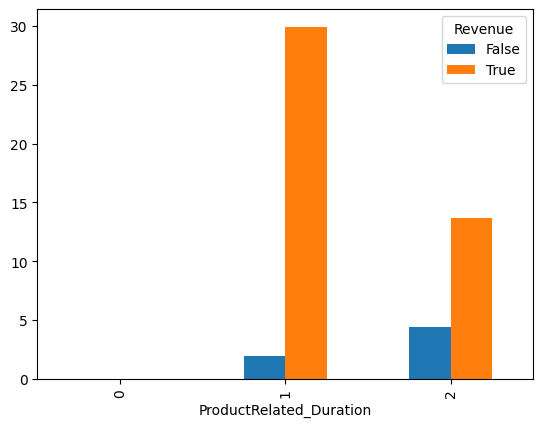

In [29]:
ct.plot.bar()

page values are very high for product related than other  

we can say product related is mostly preffered over other 

In [30]:
# count of sessions for each duration

<Axes: xlabel='Administrative_Duration', ylabel='count'>

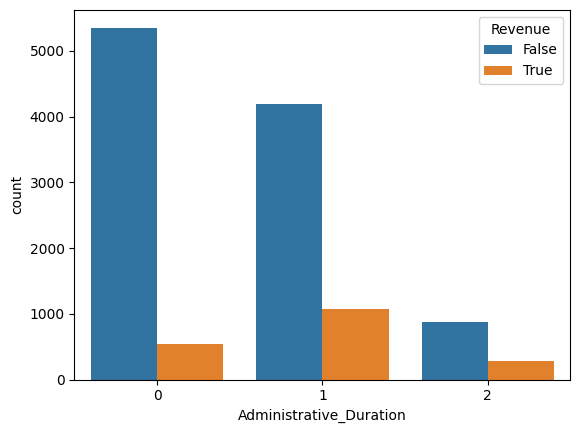

In [31]:
sns.countplot(x=df_new['Administrative_Duration'], hue=df['Revenue'])

<Axes: xlabel='Informational_Duration', ylabel='count'>

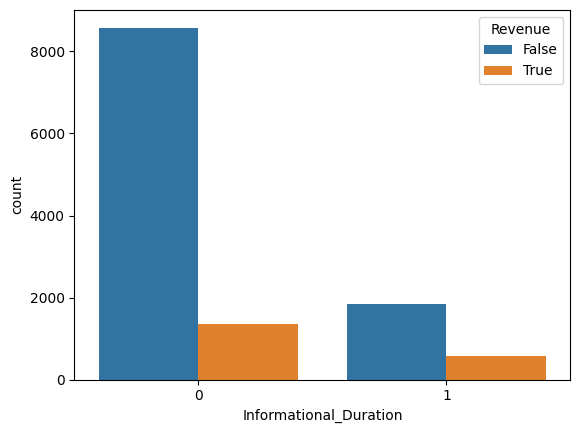

In [32]:
sns.countplot(x=df_new['Informational_Duration'], hue=df['Revenue'])


<Axes: xlabel='ProductRelated_Duration', ylabel='count'>

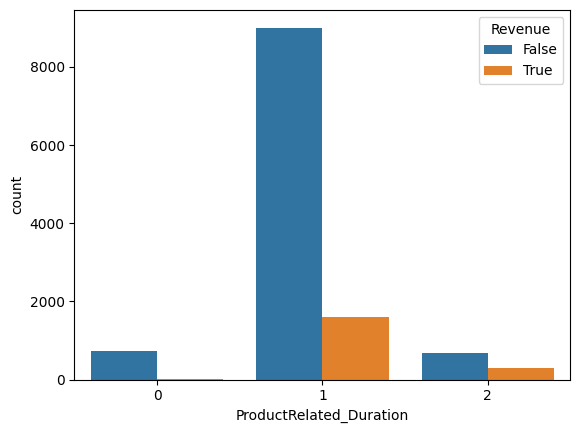

In [33]:
sns.countplot(x=df_new['ProductRelated_Duration'], hue=df['Revenue'])


we can see when sessions are product related then most of the revenue is generated 

most the time is spent on product related.

informational pages are mostly not interested 

# Region 

### region n duration vs page value

<Axes: xlabel='Region'>

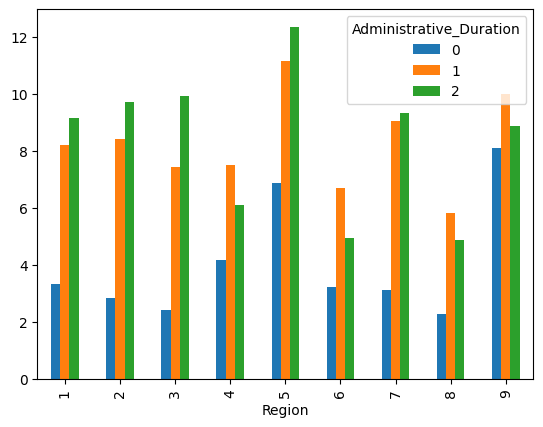

In [34]:
ct=pd.crosstab(df_new['Region'],df_new['Administrative_Duration'],values=df_new['PageValues'],aggfunc='mean')
ct.plot.bar()

<Axes: xlabel='Region'>

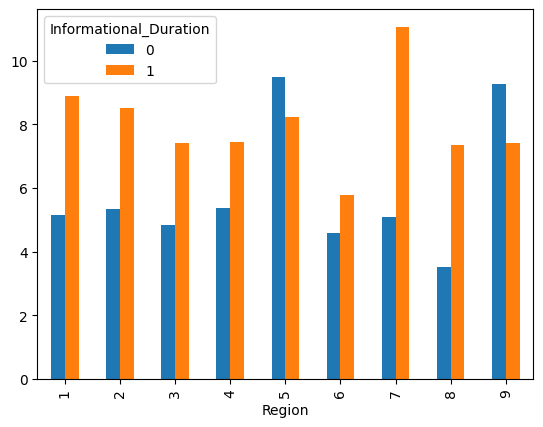

In [35]:
ct=pd.crosstab(df_new['Region'],df_new['Informational_Duration'],values=df_new['PageValues'],aggfunc='mean')
ct.plot.bar()

<Axes: xlabel='Region'>

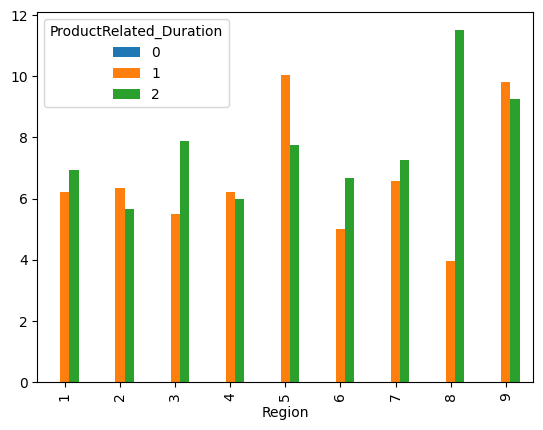

In [36]:
ct=pd.crosstab(df_new['Region'],df_new['ProductRelated_Duration'],values=df_new['PageValues'],aggfunc='mean')
ct.plot.bar()

### region n duration vs bounce rate

<Axes: xlabel='Region'>

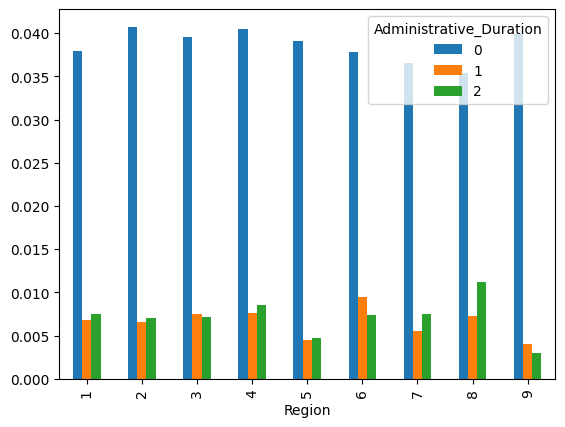

In [37]:
ct=pd.crosstab(df_new['Region'],df_new['Administrative_Duration'],values=df_new['BounceRates'],aggfunc='mean')
ct.plot.bar()

<Axes: xlabel='Region'>

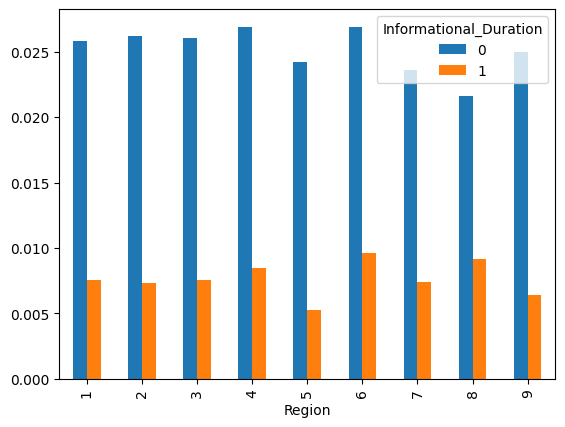

In [38]:
ct=pd.crosstab(df_new['Region'],df_new['Informational_Duration'],values=df_new['BounceRates'],aggfunc='mean')
ct.plot.bar()

<Axes: xlabel='Region'>

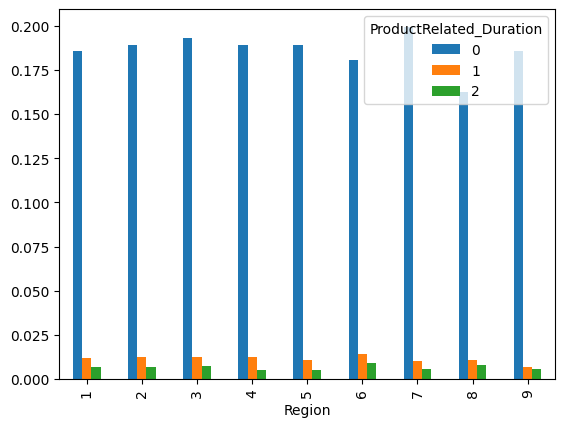

In [39]:
ct=pd.crosstab(df_new['Region'],df_new['ProductRelated_Duration'],values=df_new['BounceRates'],aggfunc='mean')
ct.plot.bar()

In [40]:
df_new.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0,0,0,1,0,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0,0,0,2,1,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0,0,0,1,0,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0,0,0,2,1,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0,0,0,10,1,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [41]:
df1=pd.get_dummies(data=df_new,columns=['Month','OperatingSystems','Browser','Region','TrafficType','VisitorType','Weekend','Revenue'],drop_first=True)
df1.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,OperatingSystems_2,OperatingSystems_3,OperatingSystems_4,OperatingSystems_5,OperatingSystems_6,OperatingSystems_7,OperatingSystems_8,Browser_2,Browser_3,Browser_4,Browser_5,Browser_6,Browser_7,Browser_8,Browser_9,Browser_10,Browser_11,Browser_12,Browser_13,Region_2,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Region_9,TrafficType_2,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,TrafficType_10,TrafficType_11,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_True,Revenue_True
0,0,0,0,0,1,0,0.20,0.20,0.0,0.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,0,0,0,0,2,1,0.00,0.10,0.0,0.0,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,0,0,0,0,1,0,0.20,0.20,0.0,0.0,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
3,0,0,0,0,2,1,0.05,0.14,0.0,0.0,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
4,0,0,0,0,10,1,0.02,0.05,0.0,0.0,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False


In [42]:
df1.rename(columns={'Revenue_True':'Revenue'},inplace=True)
df1.shape

(12330, 69)

In [43]:
df_p=df1.copy(deep=True)

# modelling

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report,confusion_matrix


In [45]:
X=df_p.drop('Revenue',axis=1)
y=df_p['Revenue']

# splitting the data into train and test

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=5)

In [47]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(9864, 68) (2466, 68) (9864,) (2466,)


# logistic regression

Logistic regression is a type of regression analysis in statistics used for prediction of outcome of a categorical dependent variable from a set of predictor or independent variables. In logistic regression the dependent variable is always binary. Logistic regression is mainly used to for prediction and also calculating the probability of success. 

In [48]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
y_pred=logreg.predict(x_test)

# confusion matrix

<Axes: >

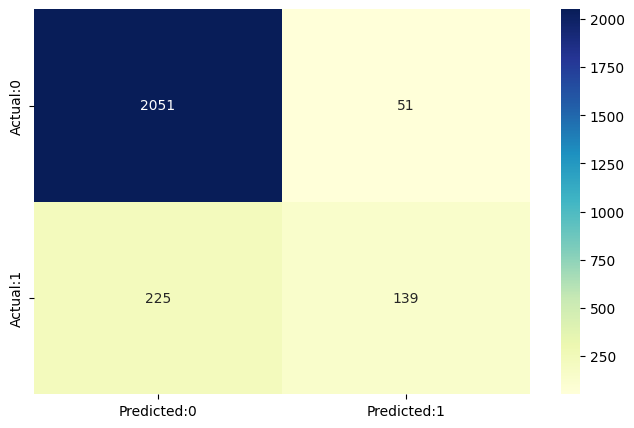

In [49]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

In [50]:
cm_reference = pd.DataFrame(np.array(["TP","FP","FN","TN"]).reshape(2,2), columns=['Predicted:0','Predicted:1'], index=['Actual:0','Actual:1'])
print(cm_reference)

         Predicted:0 Predicted:1
Actual:0          TP          FP
Actual:1          FN          TN


In [51]:
TP=cm[0,0]
TN=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [52]:
print("True Negatives :",TN)
print("True Positives :",TP)
print("False Negative :",FN," (Type II error)")
print("False Positives :",FP," (Type I error)")
print("correctly predicted :",TP+TN)
print("miss-classified :",FN+FP)

True Negatives : 139
True Positives : 2051
False Negative : 225  (Type II error)
False Positives : 51  (Type I error)
correctly predicted : 2190
miss-classified : 276


# evaluation metrics

In [53]:
print('The acuuracy of the model = TP+TN / (TP+TN+FP+FN) = ',(TP+TN)/float(TP+TN+FP+FN),'\n\n',

'The Miss-classification = 1-Accuracy = ',1-((TP+TN)/float(TP+TN+FP+FN)),'\n\n',

'Sensitivity or True Positive Rate = TP / (TP+FN) = ',TP/float(TP+FN),'\n\n',

'Specificity or True Negative Rate = TN / (TN+FP) = ',TN/float(TN+FP),'\n\n',

'Positive Predictive value = TP / (TP+FP) = ',TP/float(TP+FP),'\n\n',

'Negative predictive Value = TN / (TN+FN) = ',TN/float(TN+FN),'\n\n',

'Positive Likelihood Ratio = Sensitivity / (1-Specificity) = ',sensitivity/(1-specificity),'\n\n',

'Negative likelihood Ratio = (1-Sensitivity) / Specificity = ',(1-sensitivity)/specificity)

The acuuracy of the model = TP+TN / (TP+TN+FP+FN) =  0.8880778588807786 

 The Miss-classification = 1-Accuracy =  0.11192214111922139 

 Sensitivity or True Positive Rate = TP / (TP+FN) =  0.9011423550087874 

 Specificity or True Negative Rate = TN / (TN+FP) =  0.7315789473684211 

 Positive Predictive value = TP / (TP+FP) =  0.9757373929590866 

 Negative predictive Value = TN / (TN+FN) =  0.38186813186813184 

 Positive Likelihood Ratio = Sensitivity / (1-Specificity) =  3.3571970088562675 

 Negative likelihood Ratio = (1-Sensitivity) / Specificity =  0.1351291550239597


**From the above statistics it is clear that the model is highly sensitive than specific. The positive values are predicted more accurately than the negative i.e, it is predicting people who will not make purchase more accurately than who make purchase.**

### <font color= Blue>Predicted probabilities of  0 (will not make purchase) and 1 ( purchase)  for the test data with a default classification threshold of 0.5 <font>

In [54]:
y_pred_prob=logreg.predict_proba(x_test)[:,:]
y_pred_prob_df=pd.DataFrame(data=y_pred_prob, columns=['Prob of no purchase (0)','Prob of purchase (1)'])
y_pred_prob_df.head()

,Prob of no purchase (0),Prob of purchase (1)
0,0.914590,0.085410
1,0.969464,0.030536
2,0.969281,0.030719
3,0.159965,0.840035
4,0.957269,0.042731


- A common way to visualize the trade-offs of different thresholds is by using an ROC curve, a plot of the true positive rate ( true positives/ total  positives) versus the false positive rate ( false positives /total  negatives) for all possible choices of thresholds.
- A model with good classification accuracy should have significantly more true positives than false positives at all thresholds. 
- The optimum position for roc curve is towards the top left corner where the specificity and sensitivity are at optimum levels

In [55]:
roc_auc_score(y_test,y_pred)

0.6788027624136092

### Area Under The Curve (AUC)

- The area under the ROC curve quantifies model classification accuracy ; the higher the area, the greater the disparity between true and false positives, and the stronger the model in classifying members of the training dataset.
- An area of 0.5 corresponds to a model that performs no better than random classification and a good classifier stays as far away from that  as possible. An area of 1 is ideal. 
- The closer the AUC to 1 the better.

In [56]:
# results matrix
df_results = pd.DataFrame(columns=['Description','Misclassifications','Type I errors','Type II errors','Precision','Recall','Accuracy','F1-score','ROC AUC'])

In [57]:
# itereation results
description = "Base logit model"
misclassifications = FP + FN
type1 = FP
type2 = FN
precision = round(precision_score(y_test,y_pred),2)
recall = round(recall_score(y_test,y_pred),2)
accuracy = round(accuracy_score(y_test,y_pred),2)
f1 = round(f1_score(y_test,y_pred),2)
auc = round(roc_auc_score(y_test,y_pred),2)

df_results = pd.concat([df_results,
                        pd.DataFrame(np.array([description,
                                     misclassifications,
                                     type1,
                                     type2,
                                     precision,
                                     recall,
                                     accuracy,
                                     f1,
                                     auc]).reshape(1,-1), columns=['Description','Misclassifications','Type I errors','Type II errors','Precision','Recall','Accuracy','F1-score','ROC AUC'])
                                  ], axis=0)

df_results

,Description,Misclassifications,Type I errors,Type II errors,Precision,Recall,Accuracy,F1-score,ROC AUC
0,Base logit model,276,51,225,0.73,0.38,0.89,0.5,0.68


In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

       False       0.90      0.98      0.94      2102
        True       0.73      0.38      0.50       364

    accuracy                           0.89      2466
   macro avg       0.82      0.68      0.72      2466
weighted avg       0.88      0.89      0.87      2466



# threshold
- Since the model is predicting people who dont purchase too many type II errors is not advisable. 
- A False Negative ( ignoring the probability of purchase when there actualy is one) is more dangerous than a False Positive in this case.
- Hence inorder to increase the sensitivity,  threshold can be lowered.

In [59]:
from sklearn.preprocessing import binarize
for i in range(1,5):
  cm2 = 0
  y_pred_prob_yes = logreg.predict_proba(x_test)
  y_pred2 = np.where(y_pred_prob_yes[:, 1] > i/10, 1, 0)
  cm2 = confusion_matrix(y_test, y_pred2)
  print('With', i/10, 'threshold the Confusion Matrix is', '\n', cm2, '\n',
        'with', cm2[0, 0] + cm2[1, 1], 'correct predictions and', cm2[1, 0], 'Type II errors (False Negatives)', '\n\n',
        'Sensitivity:', cm2[1, 1] / (float(cm2[1, 1] + cm2[1, 0])), 'Specificity:', cm2[0, 0] / (float(cm2[0, 0] + cm2[0, 1])), '\n\n\n')
    

With 0.1 threshold the Confusion Matrix is 
 [[1493  609]
 [  37  327]] 
 with 1820 correct predictions and 37 Type II errors (False Negatives) 

 Sensitivity: 0.8983516483516484 Specificity: 0.7102759276879163 



With 0.2 threshold the Confusion Matrix is 
 [[1886  216]
 [ 127  237]] 
 with 2123 correct predictions and 127 Type II errors (False Negatives) 

 Sensitivity: 0.6510989010989011 Specificity: 0.8972407231208372 



With 0.3 threshold the Confusion Matrix is 
 [[1982  120]
 [ 171  193]] 
 with 2175 correct predictions and 171 Type II errors (False Negatives) 

 Sensitivity: 0.5302197802197802 Specificity: 0.9429115128449096 



With 0.4 threshold the Confusion Matrix is 
 [[2026   76]
 [ 205  159]] 
 with 2185 correct predictions and 205 Type II errors (False Negatives) 

 Sensitivity: 0.4368131868131868 Specificity: 0.9638439581351094 





In [60]:
# ROC curve

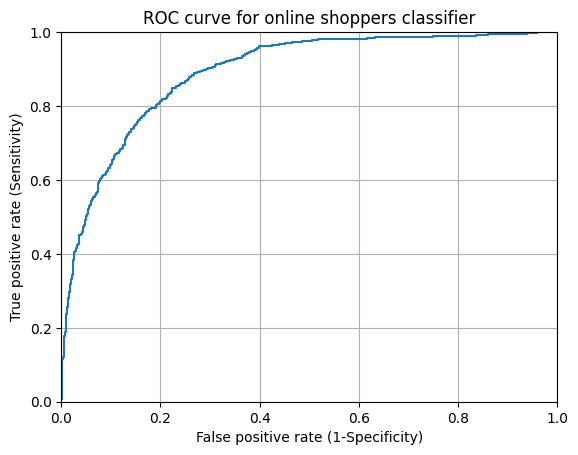

In [61]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_yes[:,1])
plt.plot(fpr,tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for online shoppers classifier')
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')
plt.grid(True)

In [62]:
## 1)Here,we can see that even decreasing threshold it is causing type 1 error.

## 2)we can use the default threshold 0.5 

## we will use kfold cv to decide which model performs better

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn import model_selection
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

In [64]:
DT=DecisionTreeClassifier()
RF=RandomForestClassifier(criterion='entropy',n_estimators=10)
Bagged=BaggingClassifier(n_estimators=100)
AB_RF=AdaBoostClassifier(base_estimator=RF,n_estimators=150)
GBoost=GradientBoostingClassifier(n_estimators=300)
KNN=KNeighborsClassifier(n_neighbors=9,weights='distance')

In [65]:
models = [] 
models.append(('DT',DT))
models.append(('RandomForest',RF))
models.append(('Bagged',Bagged))
models.append(('AdaBoostRF',AB_RF))
models.append(('GradientBoost',GBoost))
models.append(('KNN',KNN))

In [66]:
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=3,shuffle=True,random_state=0)
    cv_results = model_selection.cross_val_score(model,X,y,cv=kfold,scoring='f1_weighted')
    results.append(np.sqrt(np.abs(cv_results)))
    names.append(name)
    print("%s: %f (%f)" % (name, 1-np.mean(cv_results),np.std(cv_results,ddof=1)))


DT: 0.137340 (0.005538)
RandomForest: 0.113183 (0.008097)
Bagged: 0.104798 (0.008512)
AdaBoostRF: 0.117339 (0.008485)
GradientBoost: 0.103743 (0.009881)
KNN: 0.117516 (0.010116)


## We can see ensemble models are performing better like bagging and gradientboost and random forest.so lets try building model with them.

In [67]:
rf=RandomForestClassifier().fit(x_train,y_train)
y_pred_rf=rf.predict(x_test)
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

       False       0.92      0.97      0.94      2102
        True       0.72      0.51      0.60       364

    accuracy                           0.90      2466
   macro avg       0.82      0.74      0.77      2466
weighted avg       0.89      0.90      0.89      2466



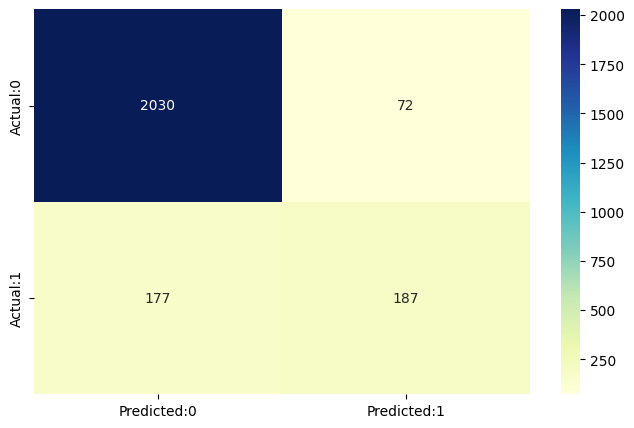

In [68]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_rf)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

TP=cm[0,0]
TN=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [69]:
# itereation results
description = "Random Forest Classifier"  #change the name of models
misclassifications = FP + FN
type1 = FP
type2 = FN
precision = round(precision_score(y_test,y_pred_rf),2)
recall = round(recall_score(y_test,y_pred_rf),2)
accuracy = round(accuracy_score(y_test,y_pred_rf),2)
f1 = round(f1_score(y_test,y_pred_rf),2)
auc = round(roc_auc_score(y_test,y_pred_rf),2)

df_results = pd.concat([df_results,
                        pd.DataFrame(np.array([description,
                                     misclassifications,
                                     type1,
                                     type2,
                                     precision,
                                     recall,
                                     accuracy,
                                     f1,
                                     auc]).reshape(1,-1), columns=['Description','Misclassifications','Type I errors','Type II errors','Precision','Recall','Accuracy','F1-score','ROC AUC'])
                                  ], axis=0)

df_results

,Description,Misclassifications,Type I errors,Type II errors,Precision,Recall,Accuracy,F1-score,ROC AUC
0,Base logit model,276,51,225,0.73,0.38,0.89,0.5,0.68
0,Random Forest Classifier,249,72,177,0.72,0.51,0.9,0.6,0.74


In [70]:
ada=AdaBoostClassifier().fit(x_train,y_train)
y_pred_ada=ada.predict(x_test)
print(classification_report(y_test,y_pred_ada))

              precision    recall  f1-score   support

       False       0.92      0.95      0.94      2102
        True       0.67      0.55      0.61       364

    accuracy                           0.89      2466
   macro avg       0.80      0.75      0.77      2466
weighted avg       0.89      0.89      0.89      2466



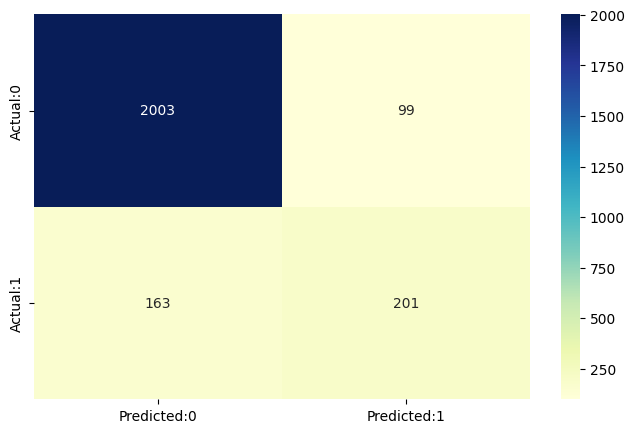

In [71]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_ada)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

TP=cm[0,0]
TN=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [72]:
# itereation results
description = "Ada Boost Classifier"  #change the name of models
misclassifications = FP + FN
type1 = FP
type2 = FN
precision = round(precision_score(y_test,y_pred_ada),2)
recall = round(recall_score(y_test,y_pred_ada),2)
accuracy = round(accuracy_score(y_test,y_pred_ada),2)
f1 = round(f1_score(y_test,y_pred_ada),2)
auc = round(roc_auc_score(y_test,y_pred_ada),2)

df_results = pd.concat([df_results,
                        pd.DataFrame(np.array([description,
                                     misclassifications,
                                     type1,
                                     type2,
                                     precision,
                                     recall,
                                     accuracy,
                                     f1,
                                     auc]).reshape(1,-1), columns=['Description','Misclassifications','Type I errors','Type II errors','Precision','Recall','Accuracy','F1-score','ROC AUC'])
                                  ], axis=0)

df_results

,Description,Misclassifications,Type I errors,Type II errors,Precision,Recall,Accuracy,F1-score,ROC AUC
0,Base logit model,276,51,225,0.73,0.38,0.89,0.5,0.68
0,Random Forest Classifier,249,72,177,0.72,0.51,0.9,0.6,0.74
0,Ada Boost Classifier,262,99,163,0.67,0.55,0.89,0.61,0.75


In [73]:
gbc=GradientBoostingClassifier().fit(x_train,y_train)
y_pred_gbc=gbc.predict(x_test)
print(classification_report(y_test,y_pred_ada))

              precision    recall  f1-score   support

       False       0.92      0.95      0.94      2102
        True       0.67      0.55      0.61       364

    accuracy                           0.89      2466
   macro avg       0.80      0.75      0.77      2466
weighted avg       0.89      0.89      0.89      2466



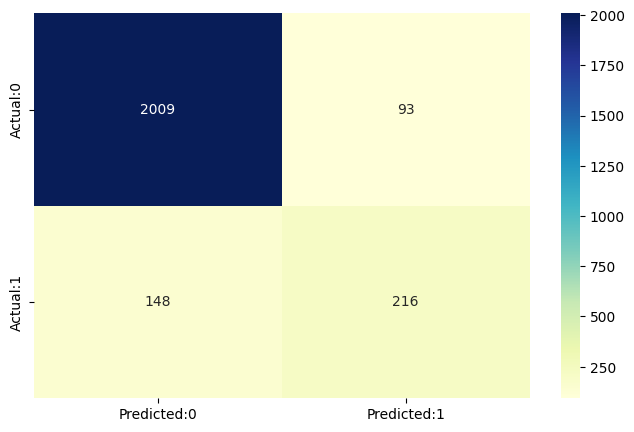

In [74]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred_gbc)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu")

TP=cm[0,0]
TN=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensitivity=TP/float(TP+FN)
specificity=TN/float(TN+FP)

In [75]:
# itereation results
description = "Gradient Boost Classifier"  #change the name of models
misclassifications = FP + FN
type1 = FP
type2 = FN
precision = round(precision_score(y_test,y_pred_gbc),2)
recall = round(recall_score(y_test,y_pred_gbc),2)
accuracy = round(accuracy_score(y_test,y_pred_gbc),2)
f1 = round(f1_score(y_test,y_pred_gbc),2)
auc = round(roc_auc_score(y_test,y_pred_gbc),2)

df_results = pd.concat([df_results,
                        pd.DataFrame(np.array([description,
                                     misclassifications,
                                     type1,
                                     type2,
                                     precision,
                                     recall,
                                     accuracy,
                                     f1,
                                     auc]).reshape(1,-1), columns=['Description','Misclassifications','Type I errors','Type II errors','Precision','Recall','Accuracy','F1-score','ROC AUC'])
                                  ], axis=0)

df_results

,Description,Misclassifications,Type I errors,Type II errors,Precision,Recall,Accuracy,F1-score,ROC AUC
0,Base logit model,276,51,225,0.73,0.38,0.89,0.5,0.68
0,Random Forest Classifier,249,72,177,0.72,0.51,0.9,0.6,0.74
0,Ada Boost Classifier,262,99,163,0.67,0.55,0.89,0.61,0.75
0,Gradient Boost Classifier,241,93,148,0.7,0.59,0.9,0.64,0.77


## with gradient boosting we got very good results and we can also redce our missclassifications .further,we use imbalanced techniques so that bias can be reduced and model can predict more accurately and show disparity between each class .